In [1]:
import vaex
import pandas as pd 
import numpy as np
import os 
from datetime import datetime
from  helpers import *
import matplotlib.pyplot as plt
from tqdm import tqdm 

In [2]:
current_dir = os.getcwd()
loading_dir = os.path.join(current_dir,"data","raw",
                           "flash_crash_DJIA","csv_files")
saving_dir = os.path.join(current_dir,"data","clean","flash_crash")

print("Current directory is {}".format(current_dir))
print("Loading directory is {}".format(loading_dir))
print("Saving directory is {}".format(saving_dir))

Current directory is /Users/yacine/Desktop/Flash_crash
Loading directory is /Users/yacine/Desktop/Flash_crash/data/raw/flash_crash_DJIA/csv_files
Saving directory is /Users/yacine/Desktop/Flash_crash/data/clean/flash_crash


### 1) Exploring Apple Stock
#### a) Trades

In [13]:
ticker = "AAPL.OQ-2010"
bbo_files, trade_files = extract_files(loading_dir,
                                       ticker,
                                       "2010-01-01",
                                       "2010-01-31")


trth_file = load_TRTH_trade(trade_files[2]) # This function reads a single file
compute(trth_file)

(                                     trade_price  trade_volume
 xltime                                                        
 2010-01-13 09:30:02.103999232-05:00      208.185           400
 2010-01-13 09:30:02.114999808-05:00      208.195           500
 2010-01-13 09:30:02.169999104-05:00      208.250           335
 2010-01-13 09:30:02.320999680-05:00      208.160           100
 2010-01-13 09:30:03.094999808-05:00      208.140           100
 ...                                          ...           ...
 2010-01-13 15:59:57.907000064-05:00      210.680           200
 2010-01-13 15:59:59.304000-05:00         210.690           200
 2010-01-13 15:59:59.334999808-05:00      210.690           200
 2010-01-13 15:59:59.356999680-05:00      210.690           300
 2010-01-13 15:59:59.624000-05:00         210.690           100
 
 [24233 rows x 2 columns],)

In [14]:
%%time 
read_TRTH_files(trade_files) # This function reads all trade files and concatenates them into a single dataframe

CPU times: user 53.4 ms, sys: 73.2 ms, total: 127 ms
Wall time: 1.05 s


,trade_price,trade_volume
xltime,,
2010-01-04 09:30:00.576999424-05:00,213.525000,400.0
2010-01-04 09:30:00.616000-05:00,213.537500,1130.0
2010-01-04 09:30:00.635999488-05:00,213.500000,100.0
2010-01-04 09:30:00.648999936-05:00,213.550000,100.0
2010-01-04 09:30:00.676999680-05:00,213.500000,100.0
...,...,...
2010-01-29 15:59:59.755999232-05:00,192.155000,300.0
2010-01-29 15:59:59.772000-05:00,192.000000,200.0
2010-01-29 15:59:59.813999616-05:00,192.185714,4048.0


#### b) BBO

In [15]:
## BBO testing function 
bbo_example = load_TRTH_bbo(bbo_files[1])
compute(bbo_example)

(                                     bid-price  bid-volume  ask-price  \
 xltime                                                                  
 2010-01-13 09:30:00.010999808-05:00     207.78           4     207.94   
 2010-01-13 09:30:00.023000064-05:00     207.80           1     207.94   
 2010-01-13 09:30:00.086000128-05:00     207.82           1     207.95   
 2010-01-13 09:30:00.096999936-05:00     207.82           1     207.95   
 2010-01-13 09:30:00.106999808-05:00     207.78           5     207.94   
 ...                                        ...         ...        ...   
 2010-01-13 15:59:59.334999808-05:00     210.66          13     210.69   
 2010-01-13 15:59:59.345999616-05:00     210.66          13     210.69   
 2010-01-13 15:59:59.613999616-05:00     210.66          13     210.69   
 2010-01-13 15:59:59.765999616-05:00     210.67          20     210.69   
 2010-01-13 15:59:59.989999616-05:00     210.66           7     210.69   
 
                                    

In [16]:
%%time 
#### Now time to test on multiple bbo files 
read_bbo_files(bbo_files)

CPU times: user 181 ms, sys: 201 ms, total: 383 ms
Wall time: 1.84 s


,bid-price,bid-volume,ask-price,ask-volume
xltime,,,,
2010-01-04 09:30:00.000999936-05:00,213.32,1,213.42,1
2010-01-04 09:30:00.009000192-05:00,213.37,1,213.50,3
2010-01-04 09:30:00.020000-05:00,213.38,2,213.50,1
2010-01-04 09:30:00.042000128-05:00,213.39,1,213.50,1
2010-01-04 09:30:00.087999744-05:00,213.40,1,213.50,1
...,...,...,...,...
2010-01-29 15:59:59.845999616-05:00,191.97,2,191.98,51
2010-01-29 15:59:59.889999360-05:00,191.97,2,191.98,50
2010-01-29 15:59:59.932999936-05:00,191.97,1,191.98,50


#### c) Merging trade and bbo files

In [17]:
%%time
result = load_merge_trade_bbo(
    ticker="AAPL.OQ-2010",
    date_start="2010-01-01",
    date_end="2010-12-31",
    dirBase=loading_dir,
    suffix="arrow",
    suffix_save=None,
    dirSaveBase=saving_dir,
    saveOnly=False,
    doSave=True
) # This function reads all trade/bbo files, merge them into a single dataframe and save the result

compute(result)

CPU times: user 392 ms, sys: 3.93 s, total: 4.32 s
Wall time: 25.8 s


(#           trade_price    trade_volume    bid-price    bid-volume    ask-price    ask-volume    index
 0           nan            nan             213.32       1.0           213.42       1.0           2010-01-04 14:30:00.000999936
 1           nan            nan             213.37       1.0           213.5        3.0           2010-01-04 14:30:00.009000192
 2           nan            nan             213.38       2.0           213.5        1.0           2010-01-04 14:30:00.020000000
 3           nan            nan             213.39       1.0           213.5        1.0           2010-01-04 14:30:00.042000128
 4           nan            nan             213.4        1.0           213.5        1.0           2010-01-04 14:30:00.087999744
 ...         ...            ...             ...          ...           ...          ...           ...
 32,198,847  322.49         100.0           322.48       24.0          322.49       26.0          2010-12-31 20:59:59.733999872
 32,198,848  nan          

In [23]:
# existing_tickers = [file_name.split(".")[0] for file_name in os.listdir(saving_dir)]
# ticker_list = [ticker_name for ticker_name in os.listdir(loading_dir) if ticker_name not in existing_tickers]

ticker_list = ["NKE.N-2010"]
for ticker_name in tqdm(ticker_list):
    result = load_merge_trade_bbo(
        ticker=ticker_name,
        date_start="2010-01-01",
        date_end="2010-12-31",
        dirBase=loading_dir,
        suffix="arrow",
        suffix_save=None,
        dirSaveBase=saving_dir,
        saveOnly=False,
        doSave=True
    ) 
    compute(result)

100%|██████████| 1/1 [00:13<00:00, 13.48s/it]


#### Now reading the file arrow: 

In [13]:
%%time
saved_dir = os.path.join(saving_dir,"AAPL.OQ-2010")
file_name = os.listdir(saved_dir)[0]
df_apple = vaex.open(os.path.join(saved_dir,file_name))
df_apple

CPU times: user 1.26 ms, sys: 17 ms, total: 18.2 ms
Wall time: 21.5 ms


#,trade_price,trade_volume,bid-price,bid-volume,ask-price,ask-volume,index
0,nan,nan,213.32,1.0,213.42,1.0,2010-01-04 14:30:00.000999936
1,nan,nan,213.37,1.0,213.5,3.0,2010-01-04 14:30:00.009000192
2,nan,nan,213.38,2.0,213.5,1.0,2010-01-04 14:30:00.020000
3,nan,nan,213.39,1.0,213.5,1.0,2010-01-04 14:30:00.042000128
4,nan,nan,213.4,1.0,213.5,1.0,2010-01-04 14:30:00.087999744
...,...,...,...,...,...,...,...
"32,198,847",322.49,100.0,322.48,24.0,322.49,26.0,2010-12-31 20:59:59.733999872
"32,198,848",nan,nan,322.48,24.0,322.49,16.0,2010-12-31 20:59:59.786999552
"32,198,849",322.49,1600.0,322.48,24.0,322.66,41.0,2010-12-31 20:59:59.798999552
"32,198,850",322.49,1093.0,nan,nan,nan,nan,2010-12-31 20:59:59.808000


In [14]:
df_apple.describe()

,trade_price,trade_volume,bid-price,bid-volume,ask-price,ask-volume,index
data_type,float64,float64,float64,float64,float64,float64,datetime64[ns]
count,5614474,5614474,29589206,29589206,29589206,29589206,32198852
NA,26584378,26584378,2609646,2609646,2609646,2609646,0
mean,255.14360764854806,270.3182312359092,252.93118142457985,4.261837543055397,252.99432089715714,4.324723177769624,1970-01-01T00:08:52.676448447
std,35.367651,358.563919,33.79709,11.973243,33.804911,12.981839,8242918289030547.0
min,190.26,100.0,190.24,1.0,190.3,1.0,2010-01-04T14:29:41.663547392
max,326.65,31100.0,326.65,1870.0,326.68,1626.0,2010-12-31T20:59:02.386573312


### Little inspection of the data 

In [15]:
df_apple['ny_time'] = df_apple['index'].apply(convert_to_ny_timezone)
df_apple


#,trade_price,trade_volume,bid-price,bid-volume,ask-price,ask-volume,index,ny_time
0,nan,nan,213.32,1.0,213.42,1.0,2010-01-04 14:30:00.000999936,"""Timestamp('2010-01-04 09:30:00.000999936-0500',..."
1,nan,nan,213.37,1.0,213.5,3.0,2010-01-04 14:30:00.009000192,"""Timestamp('2010-01-04 09:30:00.009000192-0500',..."
2,nan,nan,213.38,2.0,213.5,1.0,2010-01-04 14:30:00.020000,"""Timestamp('2010-01-04 09:30:00.020000-0500', tz..."
3,nan,nan,213.39,1.0,213.5,1.0,2010-01-04 14:30:00.042000128,"""Timestamp('2010-01-04 09:30:00.042000128-0500',..."
4,nan,nan,213.4,1.0,213.5,1.0,2010-01-04 14:30:00.087999744,"""Timestamp('2010-01-04 09:30:00.087999744-0500',..."
...,...,...,...,...,...,...,...,...
"32,198,847",322.49,100.0,322.48,24.0,322.49,26.0,2010-12-31 20:59:59.733999872,"""Timestamp('2010-12-31 15:59:59.733999872-0500',..."
"32,198,848",nan,nan,322.48,24.0,322.49,16.0,2010-12-31 20:59:59.786999552,"""Timestamp('2010-12-31 15:59:59.786999552-0500',..."
"32,198,849",322.49,1600.0,322.48,24.0,322.66,41.0,2010-12-31 20:59:59.798999552,"""Timestamp('2010-12-31 15:59:59.798999552-0500',..."
"32,198,850",322.49,1093.0,nan,nan,nan,nan,2010-12-31 20:59:59.808000,"""Timestamp('2010-12-31 15:59:59.808000-0500', tz..."


In [16]:
df_apple.describe()

,trade_price,trade_volume,bid-price,bid-volume,ask-price,ask-volume,index,ny_time
data_type,float64,float64,float64,float64,float64,float64,datetime64[ns],object
count,5614474,5614474,29589206,29589206,29589206,29589206,32198852,32198852
NA,26584378,26584378,2609646,2609646,2609646,2609646,0,0
mean,255.14360764854825,270.3182312359092,252.93118142458593,4.261837543055397,252.99432089716422,4.324723177769624,1970-01-01T00:08:52.676448447,--
std,35.367651,358.563919,33.79709,11.973243,33.804911,12.981839,8242918289442319.0,--
min,190.26,100.0,190.24,1.0,190.3,1.0,2010-01-04T14:29:41.663547392,--
max,326.65,31100.0,326.65,1870.0,326.68,1626.0,2010-12-31T20:59:02.386573312,--


### 2) Inspecting other assets

2010-12-31-2010-12-31-events.arrow


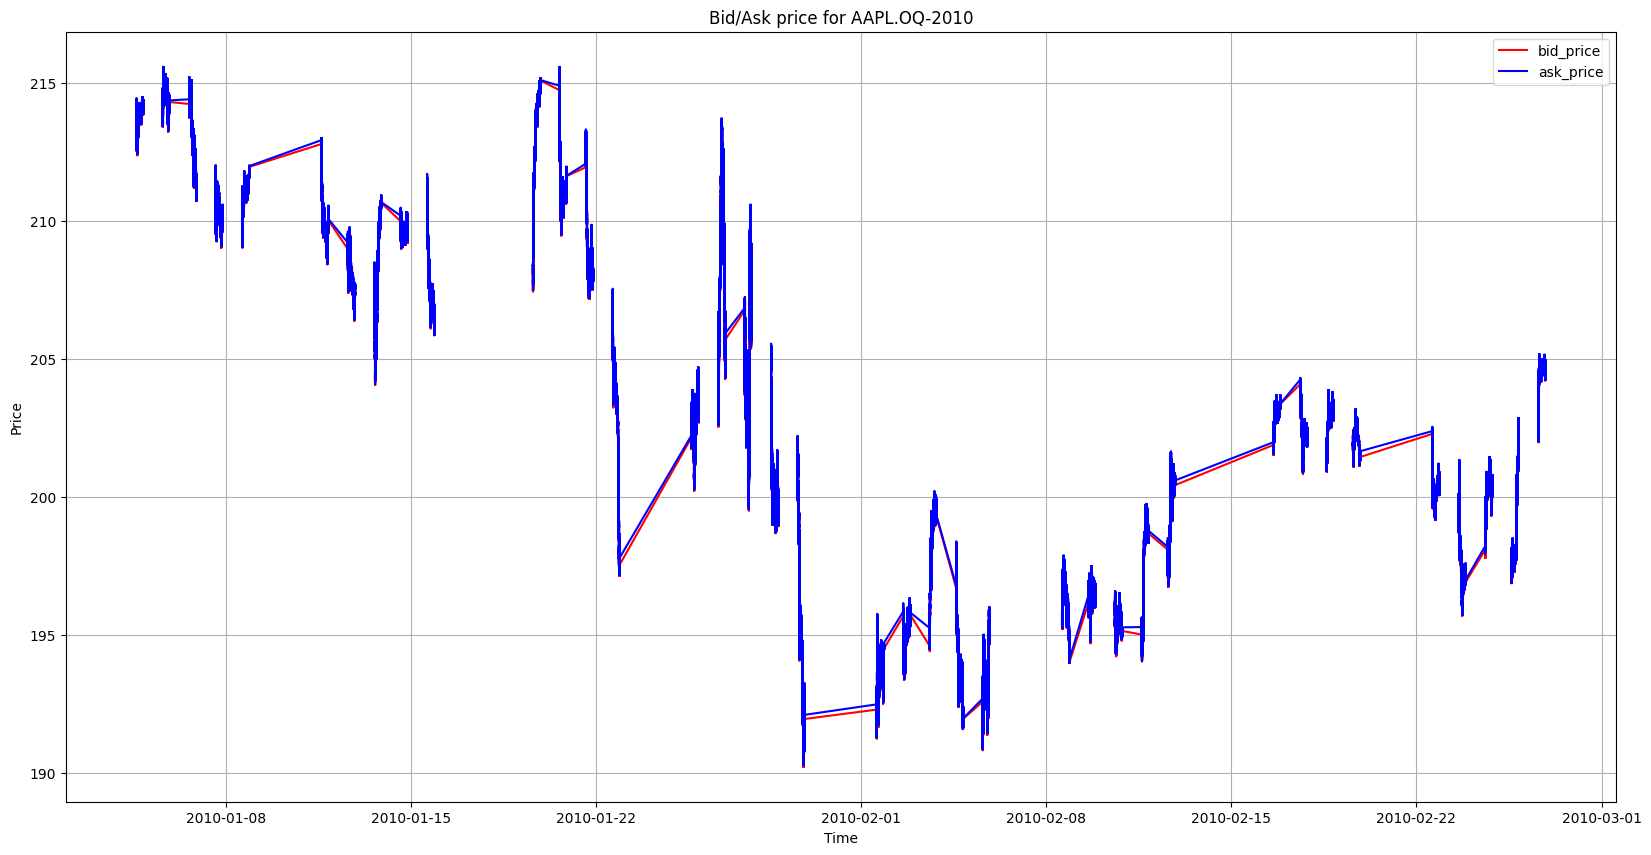

In [26]:
# ticker_name = "PG.N-2010"
ticker_name = "AAPL.OQ-2010"
result = load_merge_trade_bbo(
    ticker=ticker_name,
    date_start="2010-01-01",
    date_end="2010-12-31",
    dirBase=loading_dir,
    suffix="arrow",
    suffix_save=None,
    dirSaveBase=saving_dir,
    saveOnly=False,
    doSave=True
) # This function reads all trade/bbo files, merge them into a single dataframe and save the result
compute(result)

dir_name = os.path.join(saving_dir,ticker_name)
dow_file_name = os.listdir(dir_name)[0]
print(dow_file_name)

dow_january = vaex.open(os.path.join(dir_name,dow_file_name))
dow_january = dow_january[dow_january['index'] > "2010-01-01"  and dow_january['index'] < "2010-03-01"]
dow_january

plt.figure(figsize=(20,10))
plt.plot(dow_january['index'],dow_january['bid-price'],color='red',label='bid_price')
plt.plot(dow_january['index'],dow_january['ask-price'],color='blue',label='ask_price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Bid/Ask price for {}'.format(ticker_name))
plt.grid()
plt.legend()

In [19]:
#### (Optional) Compress the file to save space
# df.export(os.path.join(checking_dir,"test1", '2010-12-31-2010-12-31-events.arrow'), compression="brotli")   # 1.8 Gb uncompressed        

2010-02-03-2010-02-03-events.arrow


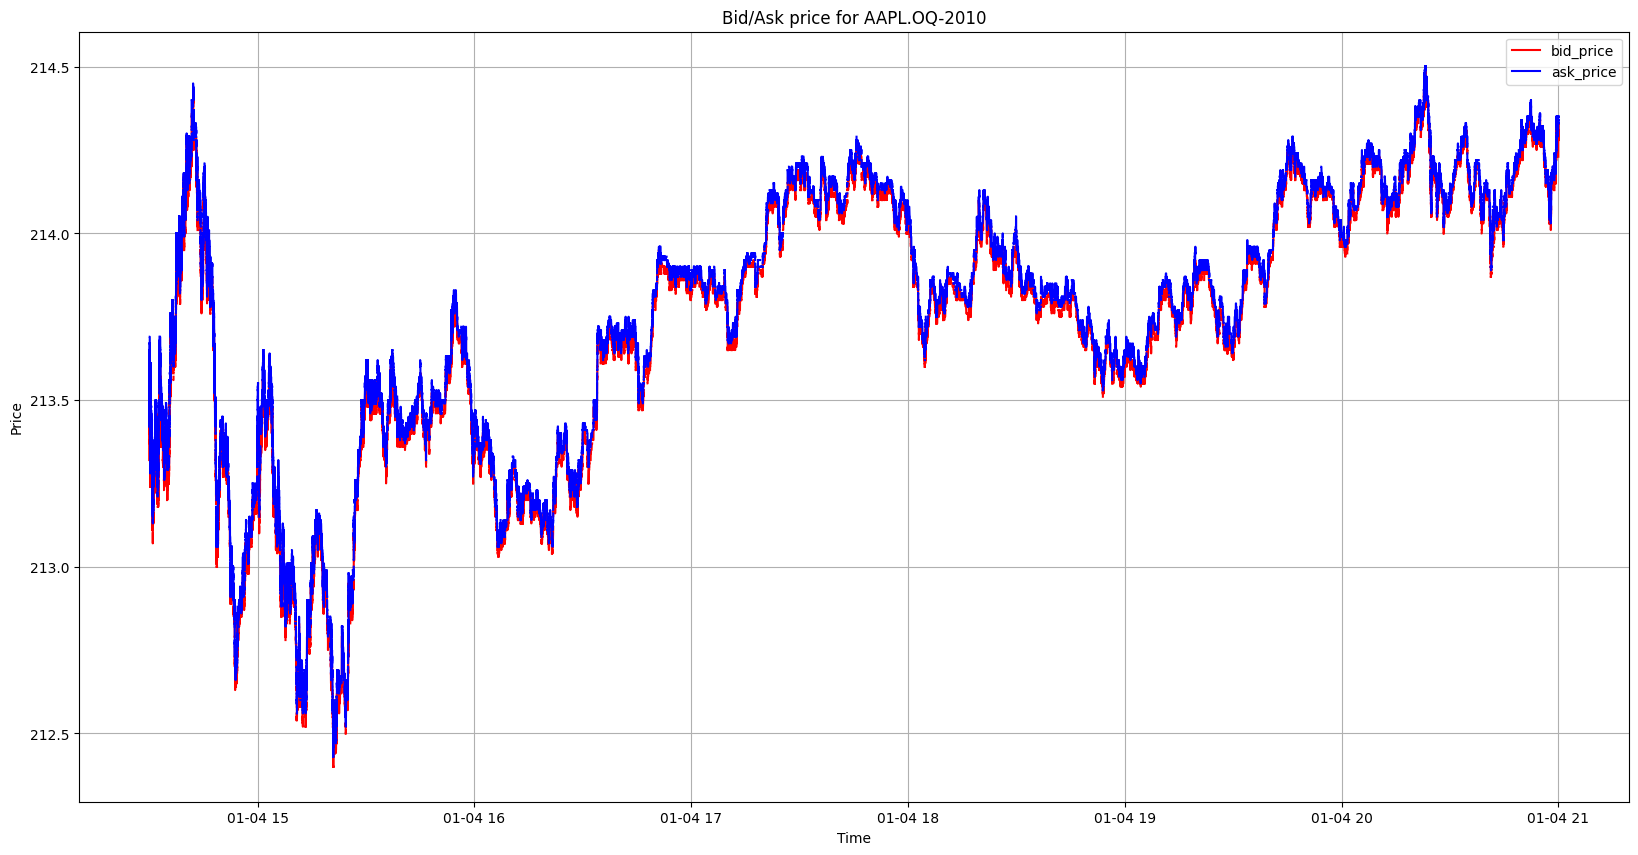

In [8]:
# ticker_name = "PG.N-2010"
ticker_name = "AAPL.OQ-2010"
result = load_merge_trade_bbo(
    ticker=ticker_name,
    date_start="2010-01-01",
    date_end="2010-02-03",
    dirBase=loading_dir,
    suffix="arrow",
    suffix_save=None,
    dirSaveBase=saving_dir,
    saveOnly=False,
    doSave=True
) # This function reads all trade/bbo files, merge them into a single dataframe and save the result
compute(result)

dir_name = os.path.join(saving_dir,ticker_name)
dow_file_name = os.listdir(dir_name)[0]
print(dow_file_name)

dow_january = vaex.open(os.path.join(dir_name,dow_file_name))
dow_january = dow_january[dow_january['index'] > "2010-01-01"  and dow_january['index'] < "2010-01-05"]
dow_january

plt.figure(figsize=(20,10))
plt.plot(dow_january['index'],dow_january['bid-price'],color='red',label='bid_price')
plt.plot(dow_january['index'],dow_january['ask-price'],color='blue',label='ask_price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Bid/Ask price for {}'.format(ticker_name))
plt.grid()
plt.legend()